Primero cargaremos todo las librerias que usaremos

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

songs= pd.read_csv('../spotify_songs.csv')
songs.head()

,track_id,track_name,track_artist,lyrics,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,language
0,0017A6SJgTbfQVU2EtsPNo,Pangarap,Barbie's Cradle,Minsan pa Nang ako'y napalingon Hindi ko alam ...,41,1srJQ0njEQgd8w4XSqI4JQ,Trip,2001-01-01,Pinoy Classic Rock,37i9dQZF1DWYDQ8wBxd7xt,...,-10.068,1,0.0236,0.27900,0.01170,0.0887,0.566,97.091,235440,tl
1,004s3t0ONYlzxII9PLgU6z,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",28,3z04Lb9Dsilqw68SHt6jLB,Love & Loss,2017-11-21,Hard Rock Workout,3YouF0u7waJnolytf9JCXf,...,-4.739,1,0.0442,0.01170,0.00994,0.3470,0.404,135.225,373512,en
2,00chLpzhgVjxs1zKC9UScL,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",0,6oZ6brjB8x3GoeSYdwJdPc,Gold,2005-01-01,"Back in the day - R&B, New Jack Swing, Swingbe...",3a9y4eeCJRmG9p4YKfqYIx,...,-7.504,0,0.2160,0.00432,0.00723,0.4890,0.650,111.904,262467,en
3,00cqd6ZsSkLZqGMlQCR0Zo,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...,41,3ssspRe42CXkhPxdc12xcp,CeeLo's Magic Moment,2012-10-29,Christmas Soul,6FZYc2BvF7tColxO8PBShV,...,-5.819,0,0.0341,0.68900,0.00000,0.0664,0.405,118.593,243067,en
4,00emjlCv9azBN0fzuuyLqy,Dumb Litty,KARD,Get up out of my business You don't keep me fr...,65,7h5X3xhh3peIK9Y0qI5hbK,KARD 2nd Digital Single ‘Dumb Litty’,2019-09-22,K-Party Dance Mix,37i9dQZF1DX4RDXswvP6Mj,...,-1.993,1,0.0409,0.03700,0.00000,0.1380,0.240,130.018,193160,en


In [144]:
features = pd.read_csv('../features.csv')
features.head()

,track_id,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature41,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50
0,047fCsbO4NdmwCBn8pcUXl,0.500593,0.329950,0.361185,0.303097,0.413862,0.339932,0.279063,0.364843,0.363516,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,05oFyvdztPdpwSwpoclD4c,0.322660,0.310444,0.471902,0.326134,0.450965,0.365918,0.381789,0.387558,0.321200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,03sno6MIkoVX5eC4pRKMzr,0.528890,0.314285,0.366243,0.485485,0.334010,0.388274,0.355649,0.543254,0.459913,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,05LCfd8s9n2teUcsTsBAnr,0.459056,0.373905,0.326302,0.329807,0.326330,0.317138,0.338123,0.374200,0.439815,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,044fQJmT2fZUYcA3BnaOL2,0.447421,0.433604,0.550555,0.413023,0.314888,0.420090,0.354317,0.477022,0.326651,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [145]:
essential = songs[["track_name", "track_artist", "lyrics","track_id"]]
essential.head()

,track_name,track_artist,lyrics,track_id
0,Pangarap,Barbie's Cradle,Minsan pa Nang ako'y napalingon Hindi ko alam ...,0017A6SJgTbfQVU2EtsPNo
1,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",004s3t0ONYlzxII9PLgU6z
2,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",00chLpzhgVjxs1zKC9UScL
3,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...,00cqd6ZsSkLZqGMlQCR0Zo
4,Dumb Litty,KARD,Get up out of my business You don't keep me fr...,00emjlCv9azBN0fzuuyLqy


In [146]:
essential = essential.dropna()
essential = essential.drop_duplicates()
essential.shape
essential.head()

,track_name,track_artist,lyrics,track_id
0,Pangarap,Barbie's Cradle,Minsan pa Nang ako'y napalingon Hindi ko alam ...,0017A6SJgTbfQVU2EtsPNo
1,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",004s3t0ONYlzxII9PLgU6z
2,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",00chLpzhgVjxs1zKC9UScL
3,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...,00cqd6ZsSkLZqGMlQCR0Zo
4,Dumb Litty,KARD,Get up out of my business You don't keep me fr...,00emjlCv9azBN0fzuuyLqy


In [147]:
vectorizer = TfidfVectorizer()
vectorizer
X = vectorizer.fit_transform(essential["lyrics"])
X

<18194x102102 sparse matrix of type '<class 'numpy.float64'>'
	with 2120968 stored elements in Compressed Sparse Row format>

In [148]:
def KNN_secuencial(query, k):
    query_vec = vectorizer.transform([query])
    results = cosine_similarity(X,query_vec).reshape((-1,))
    top_k_indices = results.argsort()[-k:][::-1]
    top_k_songs = essential.iloc[top_k_indices][["track_name", "track_artist"]]
    return top_k_songs
query = "I'm a rebel just for kicks, now"
k=5
print(KNN_secuencial(query, k))




                                 track_name       track_artist
15794                         Feel It Still  Portugal. The Man
17317                         Feel It Still  Portugal. The Man
8709   It's All on U (feat. Liam O'Donnell)           ILLENIUM
2006    It's All on U - T-Mass & LZRD Remix           ILLENIUM
12584           Rebel Rebel - 1997 Remaster        David Bowie


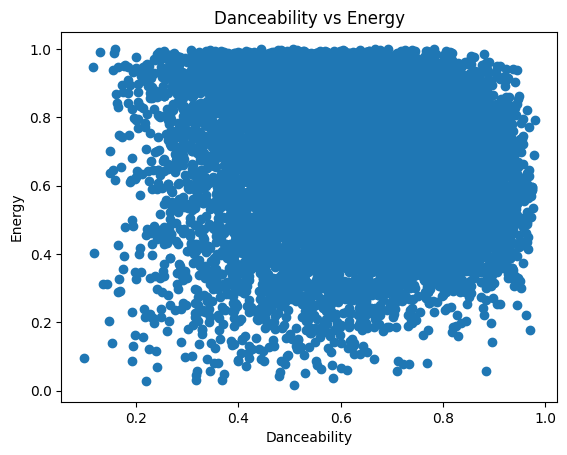

In [149]:
plt.plot(songs['danceability'], songs['energy'], 'o')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('Danceability vs Energy')
plt.show()


In [150]:
import heapq
def KNN_secuencial_heap(query, k):
    query_vec = vectorizer.transform([query])
    results = cosine_similarity(X,query_vec).reshape((-1,))
    top_k_indices = heapq.nlargest(k, range(len(results)), results.take)
    top_k_songs = essential.iloc[top_k_indices][["track_name", "track_artist"]]
    return top_k_songs

print(KNN_secuencial_heap(query, k))

                                 track_name       track_artist
15794                         Feel It Still  Portugal. The Man
17317                         Feel It Still  Portugal. The Man
2006    It's All on U - T-Mass & LZRD Remix           ILLENIUM
8709   It's All on U (feat. Liam O'Donnell)           ILLENIUM
5462            Rebel Rebel - 2016 Remaster        David Bowie


In [151]:
radius = 0.2
def KNN_range_Search(query, radius):
    query_vec = vectorizer.transform([query])
    results = cosine_similarity(X, query_vec).reshape((-1,))
    indices = np.where(results >= radius)[0]
    songs = essential.iloc[indices][["track_name", "track_artist"]]
    return songs

print(KNN_range_Search(query, radius))

                                 track_name       track_artist
2006    It's All on U - T-Mass & LZRD Remix           ILLENIUM
5462            Rebel Rebel - 2016 Remaster        David Bowie
8709   It's All on U (feat. Liam O'Donnell)           ILLENIUM
9937                              Pumped Up          Klingande
11489                               McQueen          TrifeDrew
12584           Rebel Rebel - 1997 Remaster        David Bowie
14385           Rebel Rebel - 1999 Remaster        David Bowie
15399                             Pumped Up          Klingande
15720           Rebel Rebel - 2014 Remaster        David Bowie
15786              Rebel Rebel - Remastered        David Bowie
15794                         Feel It Still  Portugal. The Man
16985                         Teenage Kicks     The Undertones
17317                         Feel It Still  Portugal. The Man
18306                       Pumped Up Kicks  Foster The People


In [152]:
first_value = songs.loc[0]
print(first_value)

track_id                                               0017A6SJgTbfQVU2EtsPNo
track_name                                                           Pangarap
track_artist                                                  Barbie's Cradle
lyrics                      Minsan pa Nang ako'y napalingon Hindi ko alam ...
track_popularity                                                           41
track_album_id                                         1srJQ0njEQgd8w4XSqI4JQ
track_album_name                                                         Trip
track_album_release_date                                           2001-01-01
playlist_name                                              Pinoy Classic Rock
playlist_id                                            37i9dQZF1DWYDQ8wBxd7xt
playlist_genre                                                           rock
playlist_subgenre                                                classic rock
danceability                                                    

In [153]:
essential_2 = songs[['track_id', 'track_name', 'track_artist', 'lyrics']]
essential_2.head()

,track_id,track_name,track_artist,lyrics
0,0017A6SJgTbfQVU2EtsPNo,Pangarap,Barbie's Cradle,Minsan pa Nang ako'y napalingon Hindi ko alam ...
1,004s3t0ONYlzxII9PLgU6z,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu..."
2,00chLpzhgVjxs1zKC9UScL,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U..."
3,00cqd6ZsSkLZqGMlQCR0Zo,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...
4,00emjlCv9azBN0fzuuyLqy,Dumb Litty,KARD,Get up out of my business You don't keep me fr...


In [154]:
essential_2 = essential_2.dropna()
essential_2 = essential_2.drop_duplicates()
essential_2.shape


(18194, 4)

In [155]:
combined_data = pd.merge(essential_2, features, on='track_id')
combined_data.shape

(2058, 54)

In [156]:
combined_data = combined_data.dropna() #Elimino la tabla con valores nulos
combined_data = combined_data.drop_duplicates() #Elimino los duplicados

combined_data.shape

(2058, 54)

In [157]:

# Seleccionar solo las columnas numéricas
features_to_normalize = combined_data.drop(['track_id', 'track_name', 'track_artist', 'lyrics'], axis=1)
features_to_normalize.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature41,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50
0,0.186783,0.313960,0.470686,0.338401,0.381696,0.290222,0.379664,0.468223,0.387875,0.453376,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.258788,0.308280,0.480829,0.386945,0.486098,0.309217,0.296758,0.394858,0.398341,0.429846,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.491523,0.528583,0.450975,0.435650,0.441585,0.468128,0.549045,0.538764,0.581056,0.591341,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.276362,0.242934,0.303423,0.419220,0.300271,0.328006,0.264648,0.257973,0.197914,0.220803,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.419527,0.319837,0.335713,0.382775,0.594782,0.402256,0.335276,0.330342,0.355163,0.370175,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [158]:
#Alineamos las filas con el conjunto de datos
features_to_normalize = features_to_normalize.loc[combined_data.index]
features_to_normalize



,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature41,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50
0,0.186783,0.313960,0.470686,0.338401,0.381696,0.290222,0.379664,0.468223,0.387875,0.453376,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.258788,0.308280,0.480829,0.386945,0.486098,0.309217,0.296758,0.394858,0.398341,0.429846,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.491523,0.528583,0.450975,0.435650,0.441585,0.468128,0.549045,0.538764,0.581056,0.591341,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.276362,0.242934,0.303423,0.419220,0.300271,0.328006,0.264648,0.257973,0.197914,0.220803,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.419527,0.319837,0.335713,0.382775,0.594782,0.402256,0.335276,0.330342,0.355163,0.370175,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,0.428063,0.251753,0.248414,0.337981,0.297210,0.381987,0.303461,0.452193,0.584452,0.323860,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2054,0.553526,0.408627,0.502690,0.540689,0.459864,0.470807,0.447189,0.545790,0.509345,0.461318,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2055,0.441209,0.489536,0.374868,0.467322,0.526453,0.408775,0.434361,0.396884,0.479114,0.422111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2056,0.326506,0.316397,0.311442,0.463714,0.328688,0.379701,0.265608,0.301476,0.344572,0.385025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [159]:
# Normalizar las características numéricas
scaler = preprocessing.StandardScaler()
scaled_features = scaler.fit_transform(features_to_normalize)
scaled_features

array([[-2.37769054, -0.82825034,  0.84599127, ...,  0.        ,
         0.        ,  0.        ],
       [-1.5729117 , -0.89654608,  0.96450188, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.02828179,  1.75218043,  0.61569148, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.46594098,  1.28271455, -0.27352737, ...,  0.        ,
         0.        ,  0.        ],
       [-0.81605402, -0.79895623, -1.01459281, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.15813721,  3.3100872 , -0.4455235 , ...,  0.        ,
         0.        ,  0.        ]])

In [160]:
# Combinar las características normalizadas con las otras columnas
normalized_combined_data = pd.concat([combined_data[['track_id', 'track_name', 'track_artist', 'lyrics']], pd.DataFrame(scaled_features, columns=features_to_normalize.columns)], axis=1)
normalized_combined_data.head()


,track_id,track_name,track_artist,lyrics,feature1,feature2,feature3,feature4,feature5,feature6,...,feature41,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50
0,0017A6SJgTbfQVU2EtsPNo,Pangarap,Barbie's Cradle,Minsan pa Nang ako'y napalingon Hindi ko alam ...,-2.377691,-0.828250,0.845991,-0.627082,-0.258815,-1.083091,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,004s3t0ONYlzxII9PLgU6z,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",-1.572912,-0.896546,0.964502,-0.075893,0.844988,-0.877021,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00chLpzhgVjxs1zKC9UScL,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",1.028282,1.752180,0.615691,0.477124,0.374368,0.846925,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00cqd6ZsSkLZqGMlQCR0Zo,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...,-1.376495,-1.682210,-1.108283,0.290573,-1.119679,-0.673185,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00emjlCv9azBN0fzuuyLqy,Dumb Litty,KARD,Get up out of my business You don't keep me fr...,0.223607,-0.757594,-0.731013,-0.123240,1.994046,0.132309,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [161]:
# Verificar si hay valores NaN en el DataFrame
nan_check = normalized_combined_data.isna().any(axis=1)

# Mostrar las filas con al menos un valor NaN
rows_with_nan = normalized_combined_data[nan_check]
print(f"Filas con al menos un valor NaN:\n{rows_with_nan}")

# Mostrar el número total de filas con al menos un valor NaN
total_rows_with_nan = rows_with_nan.shape[0]
print(f"Número total de filas con al menos un valor NaN: {total_rows_with_nan}")


Filas con al menos un valor NaN:
Empty DataFrame
Columns: [track_id, track_name, track_artist, lyrics, feature1, feature2, feature3, feature4, feature5, feature6, feature7, feature8, feature9, feature10, feature11, feature12, feature13, feature14, feature15, feature16, feature17, feature18, feature19, feature20, feature21, feature22, feature23, feature24, feature25, feature26, feature27, feature28, feature29, feature30, feature31, feature32, feature33, feature34, feature35, feature36, feature37, feature38, feature39, feature40, feature41, feature42, feature43, feature44, feature45, feature46, feature47, feature48, feature49, feature50]
Index: []

[0 rows x 54 columns]
Número total de filas con al menos un valor NaN: 0


In [162]:
normalized_combined_data

,track_id,track_name,track_artist,lyrics,feature1,feature2,feature3,feature4,feature5,feature6,...,feature41,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50
0,0017A6SJgTbfQVU2EtsPNo,Pangarap,Barbie's Cradle,Minsan pa Nang ako'y napalingon Hindi ko alam ...,-2.377691,-0.828250,0.845991,-0.627082,-0.258815,-1.083091,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,004s3t0ONYlzxII9PLgU6z,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",-1.572912,-0.896546,0.964502,-0.075893,0.844988,-0.877021,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00chLpzhgVjxs1zKC9UScL,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",1.028282,1.752180,0.615691,0.477124,0.374368,0.846925,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00cqd6ZsSkLZqGMlQCR0Zo,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...,-1.376495,-1.682210,-1.108283,0.290573,-1.119679,-0.673185,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00emjlCv9azBN0fzuuyLqy,Dumb Litty,KARD,Get up out of my business You don't keep me fr...,0.223607,-0.757594,-0.731013,-0.123240,1.994046,0.132309,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,0WEgOlUCB9nHPsoD8Ae4Zz,The Voices,dreamEater,"Heavy on the ground, I fall Running into every...",0.319005,-1.576169,-1.750997,-0.631844,-1.152047,-0.087573,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2054,0wErDMQQMhwO1DTbE6kpkt,goodbye,updog,Verse 1: Can't cope with myself tonight I thin...,1.721266,0.309937,1.219924,1.669767,0.567620,0.875994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2055,0WEv09ugUmm35vJ8mGDepn,Hoy,Morbo,NA Seguí recorriendo los caminos que siempre q...,0.465941,1.282715,-0.273527,0.836739,1.271643,0.203033,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2056,0WEVf4RhIrcr3S3ULBrt0T,LIKE I WOULD,ZAYN,Hey what's up? It's been a while Talking 'bout...,-0.816054,-0.798956,-1.014593,0.795771,-0.819243,-0.112374,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [163]:
# Seleccionar las características numéricas normalizadas
numeric_features = normalized_combined_data.drop(['track_id', 'track_name', 'track_artist', 'lyrics'], axis=1)
numeric_features

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature41,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50
0,-2.377691,-0.828250,0.845991,-0.627082,-0.258815,-1.083091,-0.103483,0.691857,-0.212519,0.368720,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.572912,-0.896546,0.964502,-0.075893,0.844988,-0.877021,-1.032394,-0.121985,-0.096271,0.108210,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.028282,1.752180,0.615691,0.477124,0.374368,0.846925,1.794336,1.474374,1.933313,1.896175,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.376495,-1.682210,-1.108283,0.290573,-1.119679,-0.673185,-1.392172,-1.640456,-2.322596,-2.206168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.223607,-0.757594,-0.731013,-0.123240,1.994046,0.132309,-0.600822,-0.837666,-0.575879,-0.552423,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,0.319005,-1.576169,-1.750997,-0.631844,-1.152047,-0.087573,-0.957289,0.514027,1.971036,-1.065189,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2054,1.721266,0.309937,1.219924,1.669767,0.567620,0.875994,0.653098,1.552306,1.136753,0.456645,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2055,0.465941,1.282715,-0.273527,0.836739,1.271643,0.203033,0.509360,-0.099510,0.800950,0.022578,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2056,-0.816054,-0.798956,-1.014593,0.795771,-0.819243,-0.112374,-1.381414,-1.157875,-0.693523,-0.388021,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [164]:
# Crear un nuevo vectorizador para las letras
text_vectorizer = TfidfVectorizer()
text_features = text_vectorizer.fit_transform(normalized_combined_data["lyrics"])
text_features

<2058x30557 sparse matrix of type '<class 'numpy.float64'>'
	with 241865 stored elements in Compressed Sparse Row format>

In [165]:
scaler = preprocessing.StandardScaler()
scaled_numeric_features = scaler.fit_transform(numeric_features)
scaled_numeric_features

array([[-2.37769054, -0.82825034,  0.84599127, ...,  0.        ,
         0.        ,  0.        ],
       [-1.5729117 , -0.89654608,  0.96450188, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.02828179,  1.75218043,  0.61569148, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.46594098,  1.28271455, -0.27352737, ...,  0.        ,
         0.        ,  0.        ],
       [-0.81605402, -0.79895623, -1.01459281, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.15813721,  3.3100872 , -0.4455235 , ...,  0.        ,
         0.        ,  0.        ]])

In [166]:
# Combinar las características normalizadas con las otras columnas
combined_features = np.hstack((scaled_numeric_features, text_features.toarray()))
combined_features

array([[-2.37769054, -0.82825034,  0.84599127, ...,  0.        ,
         0.        ,  0.        ],
       [-1.5729117 , -0.89654608,  0.96450188, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.02828179,  1.75218043,  0.61569148, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.46594098,  1.28271455, -0.27352737, ...,  0.        ,
         0.        ,  0.        ],
       [-0.81605402, -0.79895623, -1.01459281, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.15813721,  3.3100872 , -0.4455235 , ...,  0.        ,
         0.        ,  0.        ]])

In [167]:
normalized_combined_data

,track_id,track_name,track_artist,lyrics,feature1,feature2,feature3,feature4,feature5,feature6,...,feature41,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50
0,0017A6SJgTbfQVU2EtsPNo,Pangarap,Barbie's Cradle,Minsan pa Nang ako'y napalingon Hindi ko alam ...,-2.377691,-0.828250,0.845991,-0.627082,-0.258815,-1.083091,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,004s3t0ONYlzxII9PLgU6z,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",-1.572912,-0.896546,0.964502,-0.075893,0.844988,-0.877021,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00chLpzhgVjxs1zKC9UScL,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",1.028282,1.752180,0.615691,0.477124,0.374368,0.846925,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00cqd6ZsSkLZqGMlQCR0Zo,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...,-1.376495,-1.682210,-1.108283,0.290573,-1.119679,-0.673185,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00emjlCv9azBN0fzuuyLqy,Dumb Litty,KARD,Get up out of my business You don't keep me fr...,0.223607,-0.757594,-0.731013,-0.123240,1.994046,0.132309,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,0WEgOlUCB9nHPsoD8Ae4Zz,The Voices,dreamEater,"Heavy on the ground, I fall Running into every...",0.319005,-1.576169,-1.750997,-0.631844,-1.152047,-0.087573,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2054,0wErDMQQMhwO1DTbE6kpkt,goodbye,updog,Verse 1: Can't cope with myself tonight I thin...,1.721266,0.309937,1.219924,1.669767,0.567620,0.875994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2055,0WEv09ugUmm35vJ8mGDepn,Hoy,Morbo,NA Seguí recorriendo los caminos que siempre q...,0.465941,1.282715,-0.273527,0.836739,1.271643,0.203033,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2056,0WEVf4RhIrcr3S3ULBrt0T,LIKE I WOULD,ZAYN,Hey what's up? It's been a while Talking 'bout...,-0.816054,-0.798956,-1.014593,0.795771,-0.819243,-0.112374,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [168]:
import librosa

audio_path="../query.wav"

# Cargar el archivo de audio
y, sr = librosa.load(audio_path)

# Extraer características de audio (aquí puedes elegir las características que deseas)
features = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=50)  # Por ejemplo, MFCC con 50 coeficientes

# Asegurarse de que las características tengan el mismo tamaño que las del DataFrame normalized_combined_data
max_length = normalized_combined_data.shape[1] - 4  # Restamos 4 para excluir las columnas 'track_id', 'track_name', 'track_artist', 'lyrics'

# Ajustar el tamaño de las características (rellenando con ceros si es necesario)
if features.shape[1] < max_length:
    pad_width = max_length - features.shape[1]
    features = np.pad(features, pad_width=((0, 0), (0, pad_width)))

# Crear un DataFrame con las características del audio
audio_features = pd.DataFrame(features.T, columns=[f'feature_{i}' for i in range(1, 51)])

# Convertir el DataFrame de características de audio a un array NumPy
audio_features_array = audio_features.values

# Normalizar el vector de características de audio
scaled_audio_features = scaler.transform(audio_features_array)
# Convertir el array NumPy a un DataFrame
scaled_audio_features= pd.DataFrame(scaled_audio_features, columns=[f'feature_{i}' for i in range(1, 51)])
scaled_audio_features

/Users/pierre/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50
0,-568.804565,1.035777e-16,1.657243e-16,4.894044e-16,9.839878e-17,3.038278e-16,1.381035e-16,3.625218e-17,3.210907e-16,3.871215e-16,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-568.804565,1.035777e-16,1.657243e-16,4.894044e-16,9.839878e-17,3.038278e-16,1.381035e-16,3.625218e-17,3.210907e-16,3.871215e-16,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,-568.804565,1.035777e-16,1.657243e-16,4.894044e-16,9.839878e-17,3.038278e-16,1.381035e-16,3.625218e-17,3.210907e-16,3.871215e-16,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,-568.804565,1.035777e-16,1.657243e-16,4.894044e-16,9.839878e-17,3.038278e-16,1.381035e-16,3.625218e-17,3.210907e-16,3.871215e-16,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,-568.804565,1.035777e-16,1.657243e-16,4.894044e-16,9.839878e-17,3.038278e-16,1.381035e-16,3.625218e-17,3.210907e-16,3.871215e-16,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,-568.804565,1.035777e-16,1.657243e-16,4.894044e-16,9.839878e-17,3.038278e-16,1.381035e-16,3.625218e-17,3.210907e-16,3.871215e-16,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,-568.804565,1.035777e-16,1.657243e-16,4.894044e-16,9.839878e-17,3.038278e-16,1.381035e-16,3.625218e-17,3.210907e-16,3.871215e-16,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,-568.804565,1.035777e-16,1.657243e-16,4.894044e-16,9.839878e-17,3.038278e-16,1.381035e-16,3.625218e-17,3.210907e-16,3.871215e-16,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,-568.804565,1.035777e-16,1.657243e-16,4.894044e-16,9.839878e-17,3.038278e-16,1.381035e-16,3.625218e-17,3.210907e-16,3.871215e-16,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,-568.804565,1.035777e-16,1.657243e-16,4.894044e-16,9.839878e-17,3.038278e-16,1.381035e-16,3.625218e-17,3.210907e-16,3.871215e-16,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [169]:
from sklearn.neighbors import NearestNeighbors

def knn_search(query_audio_features, reference_features, k=5, metric='cosine'):
    # Inicializar el modelo KNN
    knn_model = NearestNeighbors(n_neighbors=k, metric=metric)

    # Extraer las características numéricas para el modelo KNN
    reference_features_numeric = reference_features.drop(['track_id', 'track_name', 'track_artist', 'lyrics'], axis=1)
    knn_model.fit(reference_features_numeric)

    # Convertir query_audio_features a un array NumPy
    query_features_numeric = query_audio_features.to_numpy()

    # Utilizar el modelo para encontrar los k vecinos más cercanos para la query del audio
    distances, indices = knn_model.kneighbors(query_features_numeric)

    # Obtener las k canciones más cercanas utilizando los índices
    nearest_songs = reference_features.iloc[indices[0], :54]  # Obtener solo las primeras 4 columnas

    return nearest_songs


In [170]:
#Sin normalizacion
k_nearest_songs = knn_search(audio_features, normalized_combined_data, k=5)
result = pd.DataFrame(k_nearest_songs)
result



/Users/pierre/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,track_id,track_name,track_artist,lyrics,feature1,feature2,feature3,feature4,feature5,feature6,...,feature41,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50
1652,0RHjhISKIx9SzyDDZQNk6v,Quiero Cantar,Abel Pintos,No imaginar un mundo sin fronteras Nos amarra ...,-2.436079,-1.456336,-0.909584,-1.930027,-1.331130,-1.282826,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
421,0aZPhHp1DVNVS5HAWzpUsM,Everybody Wants To Rule The World - Extended V...,Tears For Fears,Welcome to your life There's no turning back E...,-1.516398,0.028822,0.197679,-1.068396,-0.923606,-0.999519,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2027,0W2pKKNHnfZZgcAxDPW0hy,Sofia,Alvaro Soler,NA Sueño cuando era pequeño Sin preocupación e...,-1.386959,0.048993,0.889276,-0.550471,0.397813,-0.694722,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1646,0ReSY5XOCFXFRooRS7hPxk,God Only Knows (GATTÜSO Remix),for KING & COUNTRY,Wide awake while the world is sound asleepin' ...,-1.349129,-0.117642,0.221906,-0.643111,0.912223,-0.388732,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1310,0mtUvL8w3vQiMm93AfnRpO,Welcome to My Nightmare,Alice Cooper,Welcome to my nightmare I think you're gonna l...,-1.326279,-0.879316,0.450944,-0.085179,1.068363,-0.316625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [171]:
#Con normalizacion
k_nearest_songs = knn_search(scaled_audio_features, normalized_combined_data, k=5)
result = pd.DataFrame(k_nearest_songs)
result

/Users/pierre/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,track_id,track_name,track_artist,lyrics,feature1,feature2,feature3,feature4,feature5,feature6,...,feature41,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50
1652,0RHjhISKIx9SzyDDZQNk6v,Quiero Cantar,Abel Pintos,No imaginar un mundo sin fronteras Nos amarra ...,-2.436079,-1.456336,-0.909584,-1.930027,-1.331130,-1.282826,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
421,0aZPhHp1DVNVS5HAWzpUsM,Everybody Wants To Rule The World - Extended V...,Tears For Fears,Welcome to your life There's no turning back E...,-1.516398,0.028822,0.197679,-1.068396,-0.923606,-0.999519,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2027,0W2pKKNHnfZZgcAxDPW0hy,Sofia,Alvaro Soler,NA Sueño cuando era pequeño Sin preocupación e...,-1.386959,0.048993,0.889276,-0.550471,0.397813,-0.694722,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1646,0ReSY5XOCFXFRooRS7hPxk,God Only Knows (GATTÜSO Remix),for KING & COUNTRY,Wide awake while the world is sound asleepin' ...,-1.349129,-0.117642,0.221906,-0.643111,0.912223,-0.388732,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1310,0mtUvL8w3vQiMm93AfnRpO,Welcome to My Nightmare,Alice Cooper,Welcome to my nightmare I think you're gonna l...,-1.326279,-0.879316,0.450944,-0.085179,1.068363,-0.316625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [172]:
from tabulate import tabulate
from sklearn.neighbors import NearestNeighbors

def range_search(query_features, reference_features, radius):
    
    knn_model = NearestNeighbors(radius=radius, metric='euclidean')

    # Extraer las características numéricas para el modelo KNN
    reference_features_numeric = reference_features.drop(['track_id', 'track_name', 'track_artist', 'lyrics'], axis=1)

    # Ajustar el modelo con las características de referencia
    knn_model.fit(reference_features_numeric)

    # Convertir query_features a un array NumPy
    query_features_numeric = query_features.to_numpy()

    # Encontrar los vecinos dentro del radio
    indices = knn_model.radius_neighbors(query_features_numeric, return_distance=False)

    # Filtrar solo los vecinos que tienen canciones
    neighbors_with_songs = [neighbor for neighbor in indices if len(neighbor) > 0]

    # Obtener los nombres de las canciones para cada vecino
    song_names = []
    for neighbor_indices in neighbors_with_songs:
        songs_in_neighbor = reference_features.iloc[neighbor_indices][['track_name']].values.flatten().tolist()
        song_names.append(songs_in_neighbor)

    return song_names


In [173]:
radius = 250  
indices_within_radius = range_search(scaled_audio_features, normalized_combined_data, radius)
result = pd.DataFrame(indices_within_radius)
result

/Users/pierre/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,She Don't Give a Fo,In Between Days - 2006 Remaster,Fuentes de Ortiz,They Don't Know,Favorite Part Of Me,Pony - Recorded at Spotify Studios NYC,Rendezvous,Falling Like The Stars - Madism Remix,Los Puti (with Lele Pons & Lyanno),Handful Of Gold,Cornerstone,Don't Rush (feat. Headie One),No Te Veo - Remix
